In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

clean_path = r"C:\weather_monitoring_project\Data\clean_data.csv"

df = pd.read_csv(clean_path)
df.head()

,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone,hour,day,month,weekday
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0,0,16,11,Sunday
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0,0,16,11,Sunday
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0,0,16,11,Sunday
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0,0,16,11,Sunday
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0,0,16,11,Sunday


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10035 entries, 0 to 10034
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10035 non-null  int64  
 1   city              10035 non-null  object 
 2   timestamp         10035 non-null  object 
 3   temperature       10035 non-null  float64
 4   humidity          10035 non-null  float64
 5   wind_speed        10035 non-null  float64
 6   pm10              10035 non-null  float64
 7   pm2_5             10035 non-null  float64
 8   nitrogen_dioxide  10035 non-null  float64
 9   ozone             10035 non-null  float64
 10  hour              10035 non-null  int64  
 11  day               10035 non-null  int64  
 12  month             10035 non-null  int64  
 13  weekday           10035 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 1.1+ MB


## Correlation between numeric variables

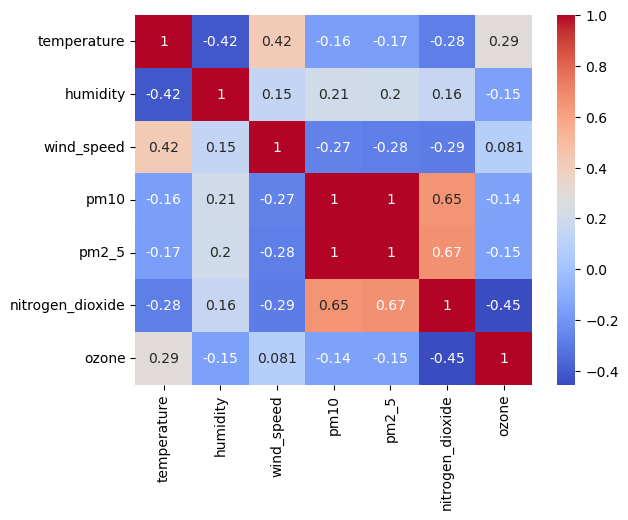

In [3]:
num_columns = ['temperature', 'humidity', 'wind_speed',	'pm10', 'pm2_5', 'nitrogen_dioxide', 'ozone']
sns.heatmap(df[num_columns].corr(), annot=True,cmap='coolwarm')
plt.show()

## MAX and MIN temperature


In [4]:
max_temp = df.groupby('city')['temperature'].max().sort_values(ascending=False).head(5)
min_temp = df.groupby('city')['temperature'].min().sort_values(ascending=True).head(5)

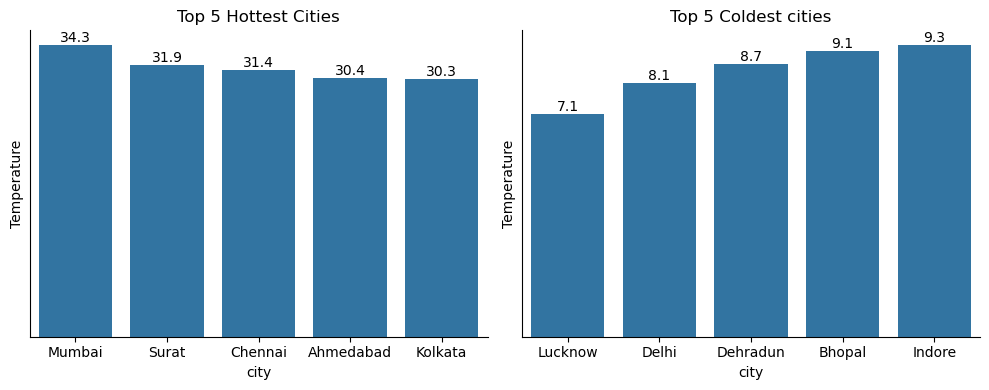

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=max_temp.index, y=max_temp.values, ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_yticks([])
ax[0].set_title('Top 5 Hottest Cities')
ax[0].set_ylabel('Temperature')


sns.barplot(x=min_temp.index,y=min_temp.values, ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_yticks([])
ax[1].set_title('Top 5 Coldest cities')
ax[1].set_ylabel('Temperature')

plt.tight_layout()
sns.despine()
plt.show()

## MIN and MAX pm10 and pm2.5

In [6]:
max_pm2_5 = df.groupby('city')['pm2_5'].max().sort_values(ascending=False).head(5)
min_pm2_5 = df.groupby('city')['pm2_5'].max().sort_values(ascending=True).head(5)
max_pm10 = df.groupby('city')['pm10'].max().sort_values(ascending=False).head(5)
min_pm10 = df.groupby('city')['pm10'].max().sort_values(ascending=True).head(5)

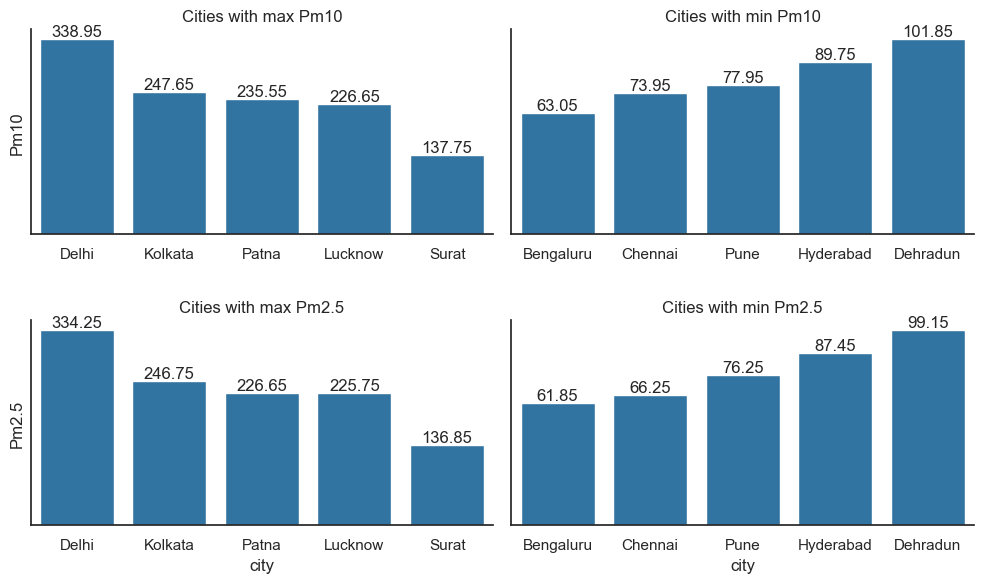

In [7]:
sns.set_theme(style="white", palette=None)
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

sns.barplot(x=max_pm10.index, y=max_pm10.values, ax=ax[0,0])
ax[0,0].bar_label(ax[0,0].containers[0])
ax[0,0].set_title('Cities with max Pm10')
ax[0,0].set_ylabel('Pm10')
ax[0,0].set_yticks([ ])
ax[0,0].set_xlabel(' ')

sns.barplot(x=min_pm10.index, y=min_pm10.values, ax=ax[0,1])
ax[0,1].bar_label(ax[0,1].containers[0])
ax[0,1].set_title('Cities with min Pm10')
ax[0,1].set_yticks([ ])

sns.barplot(x=max_pm2_5.index, y=max_pm2_5.values, ax=ax[1,0])
ax[1,0].bar_label(ax[1,0].containers[0])
ax[1,0].set_title('Cities with max Pm2.5')
ax[1,0].set_ylabel('Pm2.5')
ax[1,0].set_yticks([ ])
ax[0,1].set_xlabel(' ')

sns.barplot(x=min_pm2_5.index, y=min_pm2_5.values, ax=ax[1,1])
ax[1,1].bar_label(ax[1,1].containers[0])
ax[1,1].set_title('Cities with min Pm2.5')
ax[1,1].set_yticks([ ])

plt.tight_layout()
sns.despine()
plt.show()

## CityWise temperature Trend

In [8]:
city = df[df['city'] == 'Dehradun']

city_temp = city.groupby('hour')['temperature'].mean().reset_index()


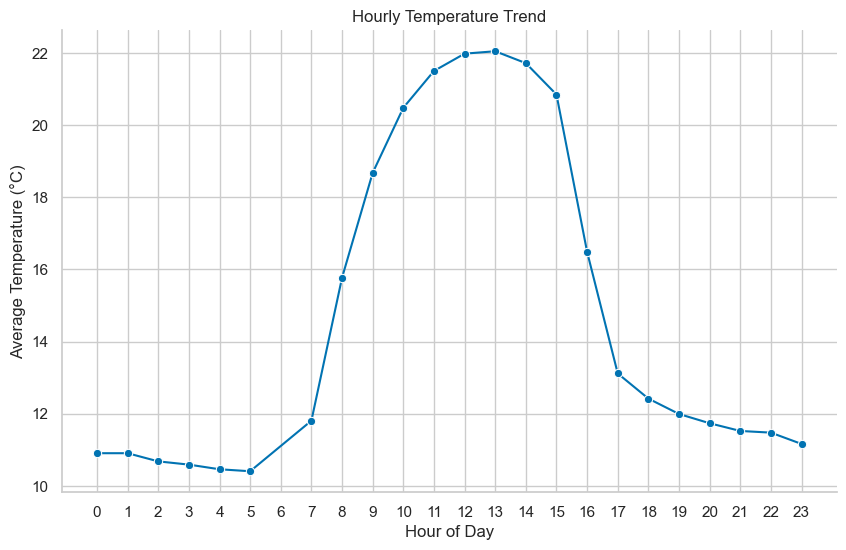

In [9]:
sns.set_theme(style="whitegrid", palette="colorblind")
plt.figure(figsize=(10,6))

sns.lineplot(data=city_temp, x='hour', y='temperature', marker='o')

plt.xticks(range(0, 24))

plt.title("Hourly Temperature Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Average Temperature (°C)")

sns.despine()
plt.show()

## citywise pm10 and pm2.5 hourly trend

In [10]:
city = df[df['city'] == 'Dehradun']

city_pm = city.groupby('hour')[['pm10', 'pm2_5']].mean().reset_index()


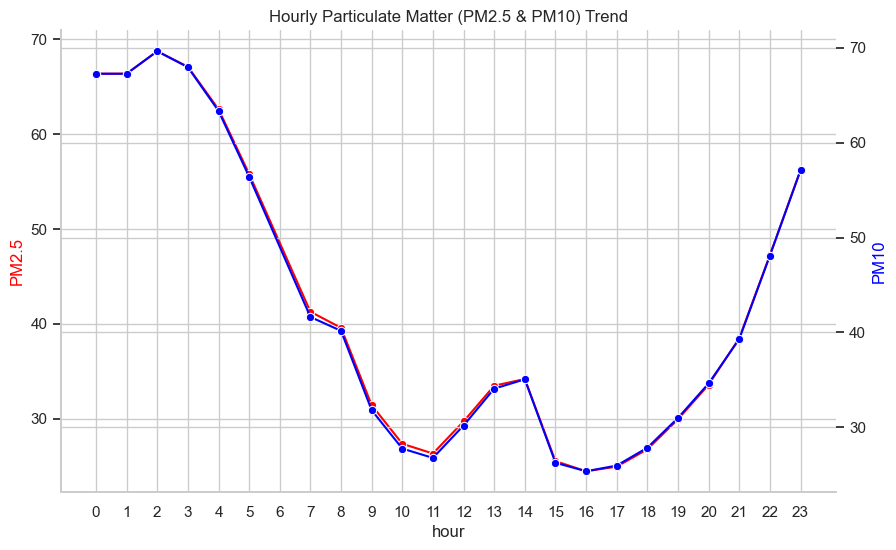

In [11]:
sns.set_theme(style="whitegrid", palette="colorblind")

fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=city_pm, x='hour', y='pm2_5', marker='o', ax=ax, color="red")
ax.set_ylabel("PM2.5", color="red")

ax2 = ax.twinx()
sns.lineplot(data=city_pm, x='hour', y='pm10', marker='o', ax=ax2, color="blue")
ax2.set_ylabel("PM10", color="blue")

plt.xticks(range(0, 24))


plt.title("Hourly Particulate Matter (PM2.5 & PM10) Trend")
sns.despine()
plt.show()


According to the graph above they both have very positive correlation( as shown above in above heatmap) that's why both line are
over each other 